In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the dataset of Customer ENDPOINT
CE_df = pd.read_csv('PV Data/PV Data - csv files only/2014-11-28 Cleansed and Processed/EXPORT HourlyData/EXPORT HourlyData - Customer Endpoints.csv', sep=',')

#Some INFO
print(CE_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52352 entries, 0 to 52351
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SerialNo                       52352 non-null  object 
 1   Substation                     52352 non-null  object 
 2   datetime                       52352 non-null  object 
 3   t_date                         52352 non-null  object 
 4   t_time                         52352 non-null  object 
 5   d_y                            52352 non-null  int64  
 6   d_m                            52352 non-null  int64  
 7   d_d                            52352 non-null  int64  
 8   d_w                            52352 non-null  int64  
 9   t_h                            52352 non-null  int64  
 10  t_m                            52352 non-null  int64  
 11  V_MIN                          52352 non-null  float64
 12  V_MIN_Filtered                 52352 non-null 

In [4]:
#datetime conversion
CE_df['datetime'] = pd.to_datetime(CE_df['datetime'])

In [8]:
print(CE_df['datetime'].head())

0   2013-10-01 12:00:00
1   2013-10-01 13:00:00
2   2013-10-01 14:00:00
3   2013-10-01 15:00:00
4   2013-10-01 16:00:00
Name: datetime, dtype: datetime64[ns]


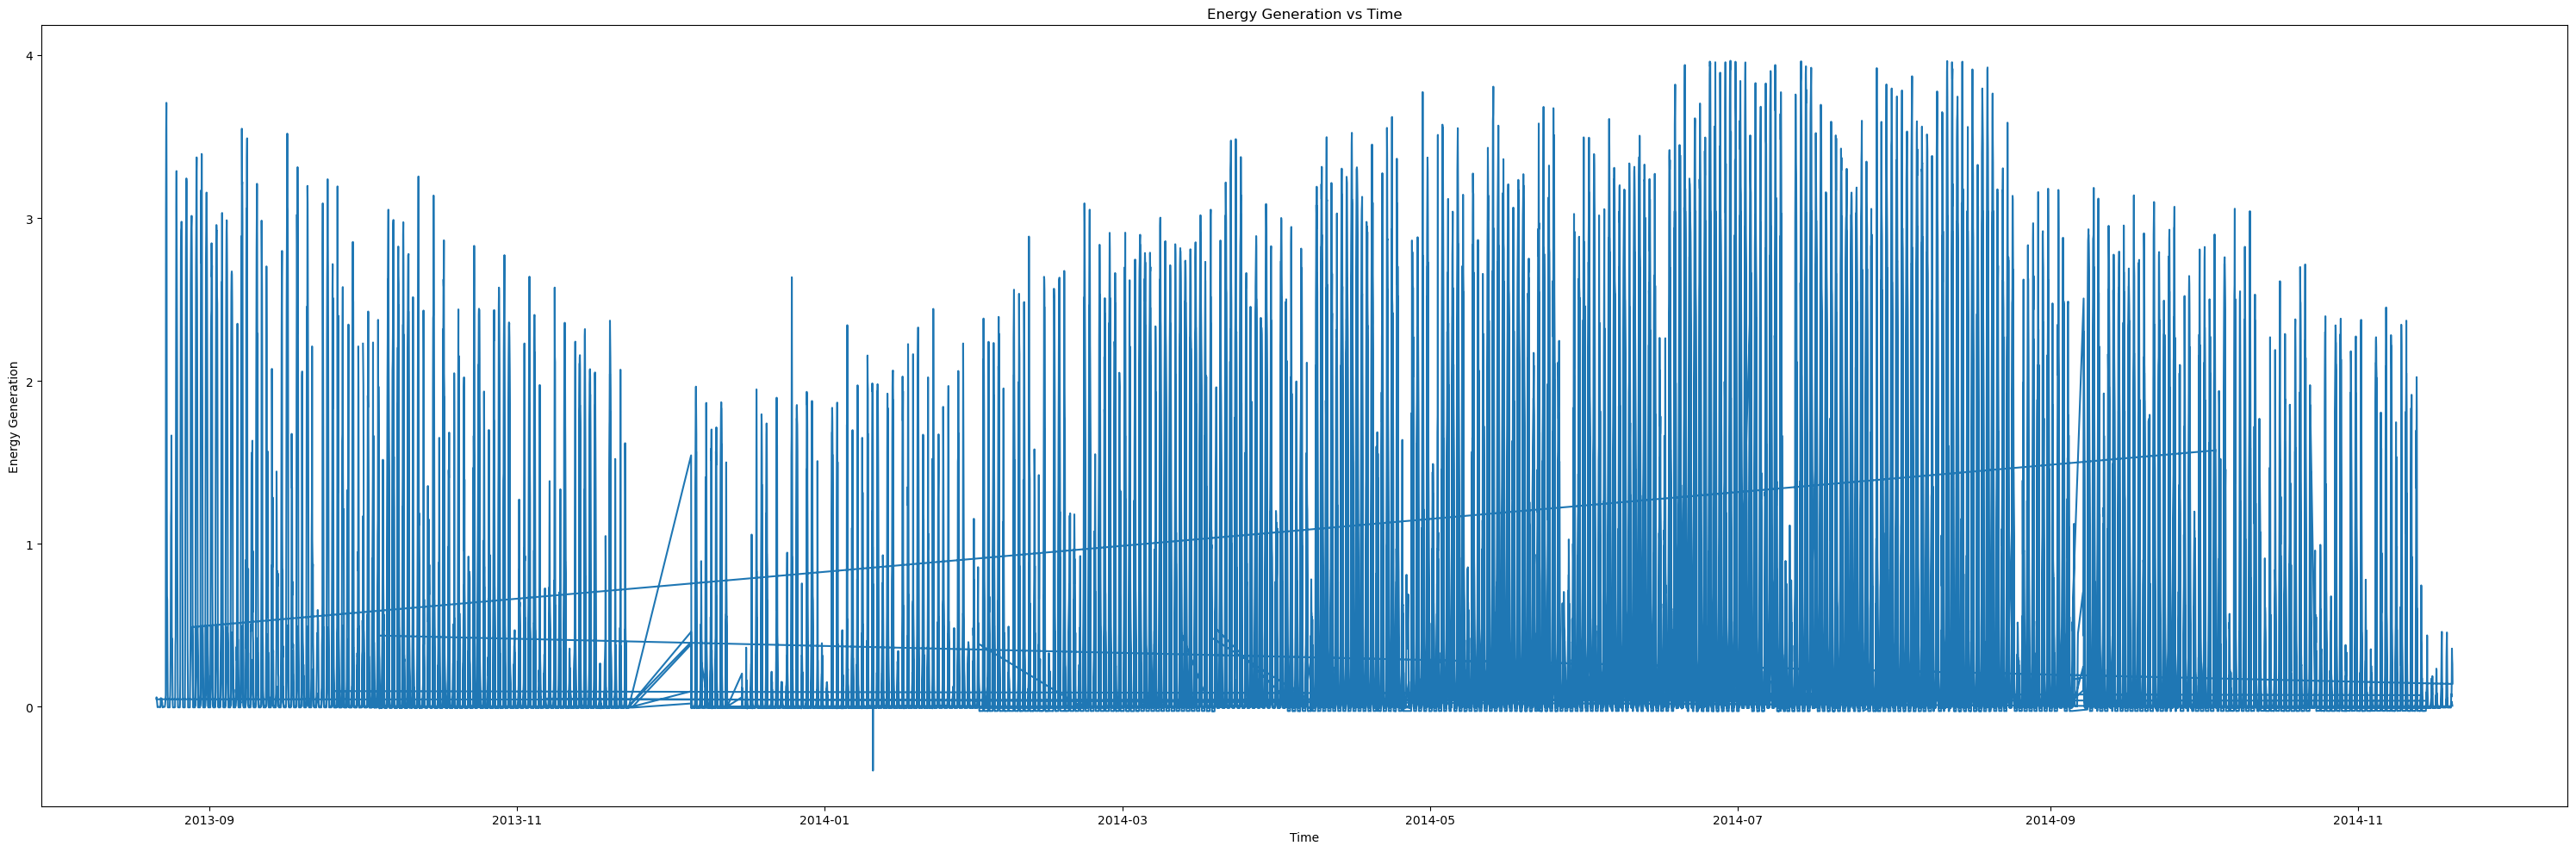

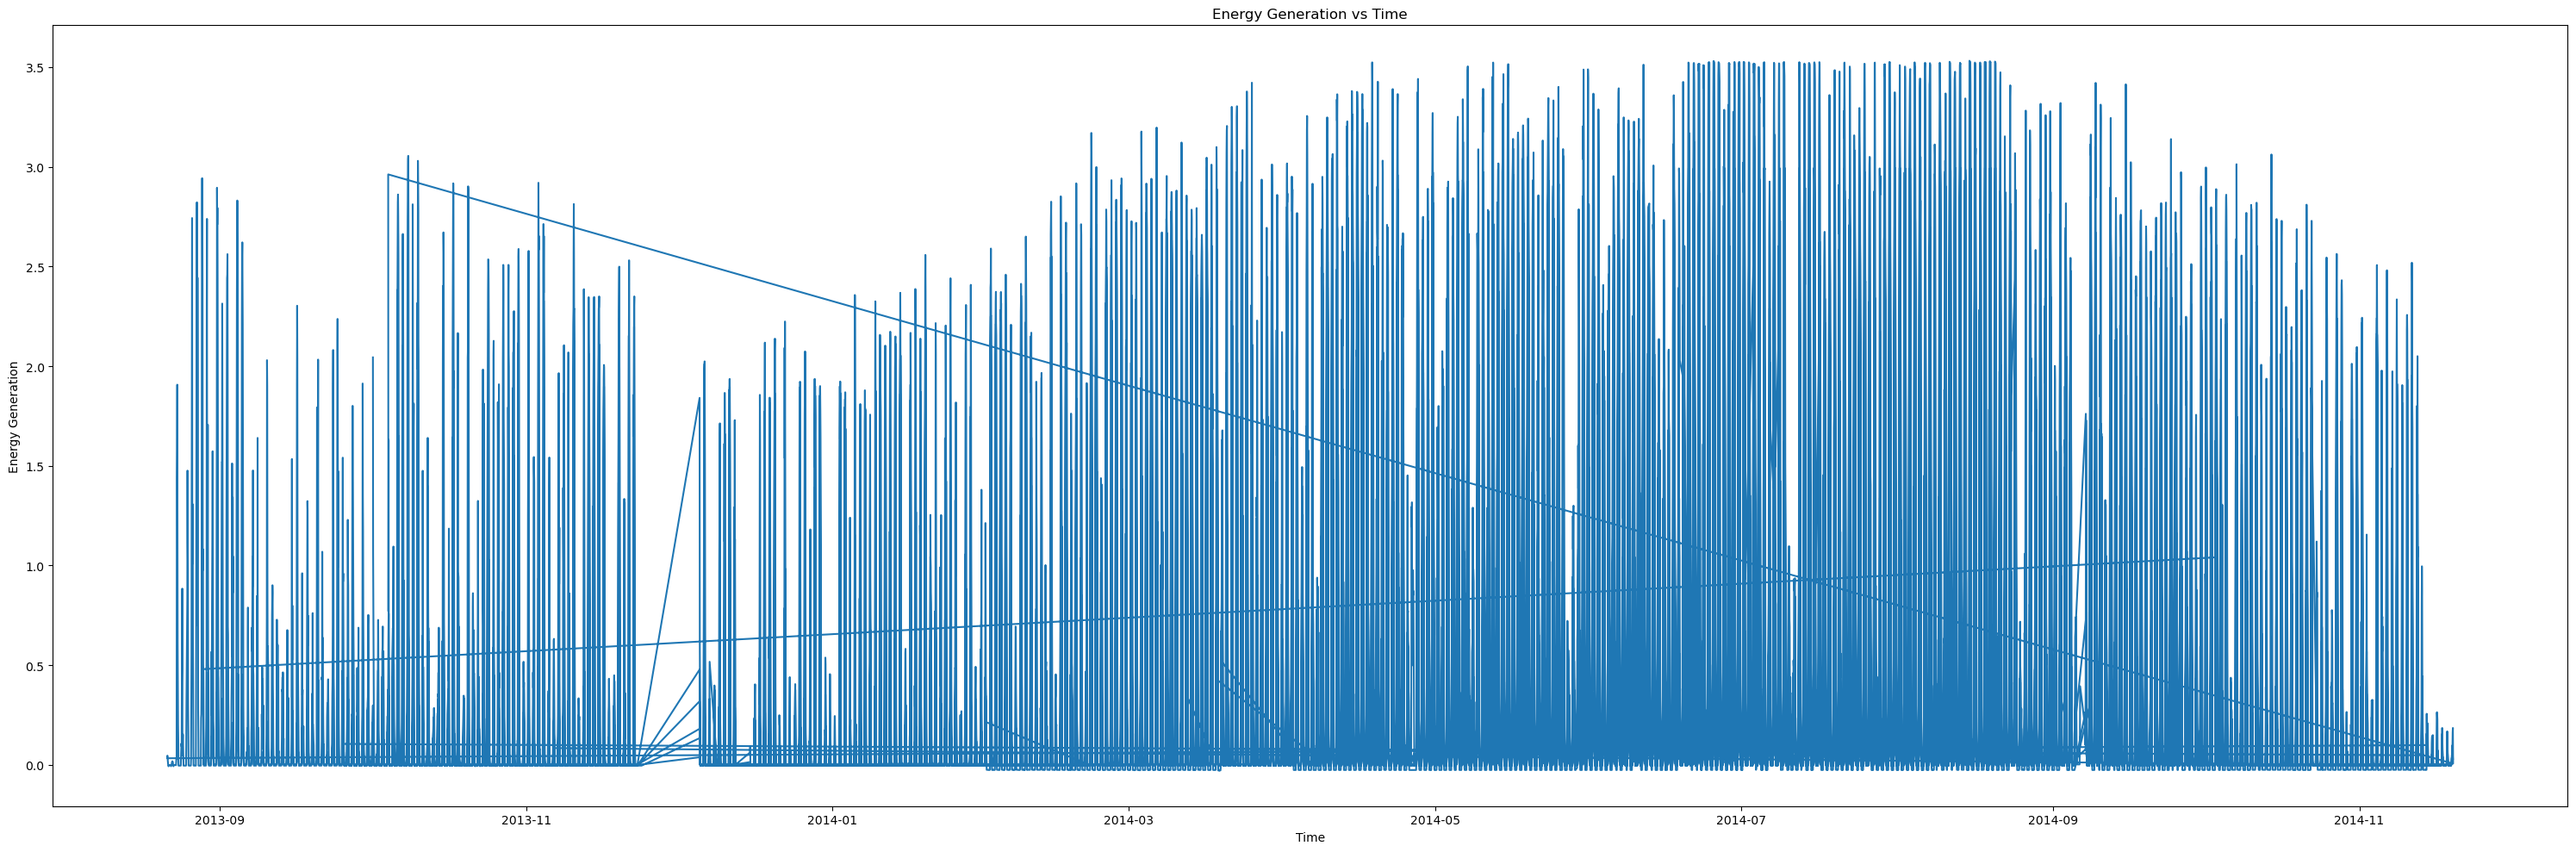

In [18]:


plt.figure(figsize=(30, 10))
plt.plot(CE_df['datetime'], CE_df['P_GEN_MIN'])
plt.xlabel('Time')
plt.ylabel('Energy Generation')
plt.title('Energy Generation vs Time')
plt.tight_layout()
plt.show()


plt.figure(figsize=(30, 10))
plt.plot(CE_df['datetime'], CE_df['P_GEN_MAX'])
plt.xlabel('Time')
plt.ylabel('Energy Generation')
plt.title('Energy Generation vs Time')
plt.tight_layout()
plt.show()

In [19]:
#loading weather data
weather_df = pd.read_csv('PV Data/Weather Data 2014-11-30.csv', sep=',')

C:\Users\MSI\AppData\Local\Temp\ipykernel_19148\2833402402.py:2: DtypeWarning: Columns (5,6,7,8,9,15,16,17,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_df = pd.read_csv('PV Data/Weather Data 2014-11-30.csv', sep=',')


In [20]:
print(weather_df.head(5))

   Site      Date  Month     Time  Hour TempOut HiTemp LowTemp OutHum DewPt  \
0  YMCA  1/7/2014      1  2:30 PM   14     10.6   10.6    10.4     84   8.0   
1  YMCA  1/7/2014      1  3:00 PM   15     10.7   10.8    10.6     83   7.9   
2  YMCA  1/7/2014      1  3:30 PM   15     10.7   10.8    10.7     81   7.6   
3  YMCA  1/7/2014      1  4:00 PM   16     10.4   10.7    10.3     82   7.4   
4  YMCA  1/7/2014      1  4:30 PM   16     10.3   10.4    10.3     84   7.7   

   ...  InHum InDew  InHeat  InEMC InAirDensity    ET WindSamp WindTx  \
0  ...     50   6.8    16.3   9.39       0.0739  0.00      385      1   
1  ...     50   6.8    16.2   9.39       0.0740  0.03      702      1   
2  ...     50   6.6    16.1   9.39       0.0740  0.00      703      1   
3  ...     50   6.6    16.1   9.39       0.0741  0.03      702      1   
4  ...     50   6.3    15.8   9.40       0.0742  0.00      703      1   

  ISSRecept  ArcInt  
0      56.3      30  
1     100.0      30  
2     100.0      30 

In [21]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69480 entries, 0 to 69479
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Site          69480 non-null  object 
 1   Date          69480 non-null  object 
 2   Month         69480 non-null  int64  
 3   Time          69480 non-null  object 
 4   Hour          69480 non-null  object 
 5   TempOut       69480 non-null  object 
 6   HiTemp        69480 non-null  object 
 7   LowTemp       69480 non-null  object 
 8   OutHum        69480 non-null  object 
 9   DewPt         69480 non-null  object 
 10  WindSpeed     69480 non-null  int64  
 11  WindDir       69480 non-null  object 
 12  WindRun       69480 non-null  float64
 13  HiSpeed       69480 non-null  int64  
 14  HiDir         69480 non-null  object 
 15  WindChill     69480 non-null  object 
 16  HeatIndex     69480 non-null  object 
 17  THWIndex      69480 non-null  object 
 18  THSWIndex     69480 non-nu

In [ ]:
#formating time from 12-hour to 24-hour format
weather_df['Timeformt'] = pd.to_datetime(weather_df['Time'], format='%I:%M %p').dt.strftime('%H:%M:%S')

print(weather_df['Timeformt'].head())

0    14:30:00
1    15:00:00
2    15:30:00
3    16:00:00
4    16:30:00
Name: Timeformt, dtype: object


In [33]:
# Combine 'Date' and 'Timeformt' into a single datetime string
weather_df['datetime'] = pd.to_datetime(weather_df['Date'].str.strip() + ' ' + weather_df['Timeformt'])

# Now 'weather_df["datetime"]' contains the combined datetime in pandas datetime format
print(weather_df[['Date', 'Timeformt', 'datetime']].head())

       Date Timeformt            datetime
0  1/7/2014  14:30:00 2014-01-07 14:30:00
1  1/7/2014  15:00:00 2014-01-07 15:00:00
2  1/7/2014  15:30:00 2014-01-07 15:30:00
3  1/7/2014  16:00:00 2014-01-07 16:00:00
4  1/7/2014  16:30:00 2014-01-07 16:30:00


In [36]:
weather_df = weather_df.rename(columns={'Site': 'Substation'})

In [37]:
#merging power generation and weather data on site and on datetime
merged_df = pd.merge(weather_df, CE_df, on=['Substation', 'datetime'], how='inner')

In [41]:
merged_df.head()

,Substation,Date,Month,Time,Hour,TempOut,HiTemp,LowTemp,OutHum,DewPt,...,Substation_thdVB_MIN_Filtered,Substation_thdVB_MAX_Filtered,Substation_thdVC_MIN_Filtered,Substation_thdVC_MAX_Filtered,V_MAX_Rise_vs_VA_MIN_Filtered,V_MAX_Rise_vs_VA_MAX_Filtered,V_MAX_Rise_vs_VB_MIN_Filtered,V_MAX_Rise_vs_VB_MAX_Filtered,V_MAX_Rise_vs_VC_MIN_Filtered,V_MAX_Rise_vs_VC_MAX_Filtered
0,YMCA,1/7/2014,1,3:00 PM,15,10.7,10.8,10.6,83,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YMCA,1/7/2014,1,4:00 PM,16,10.4,10.7,10.3,82,7.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YMCA,1/7/2014,1,5:00 PM,17,10.3,10.4,10.3,83,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YMCA,1/7/2014,1,6:00 PM,18,10.2,10.3,10.2,85,7.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YMCA,1/7/2014,1,7:00 PM,19,9.8,10.1,9.8,87,7.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
merged_df.to_csv('merged_data.csv', index=False)

In [46]:
# Convert columns to numeric, set errors='coerce' to turn '---' into NaN
merged_df['TempOut'] = pd.to_numeric(merged_df['TempOut'], errors='coerce')
merged_df['P_GEN_MAX'] = pd.to_numeric(merged_df['P_GEN_MAX'], errors='coerce')


In [47]:
merged_df['TempOut'].head()

0    10.7
1    10.4
2    10.3
3    10.2
4     9.8
Name: TempOut, dtype: float64

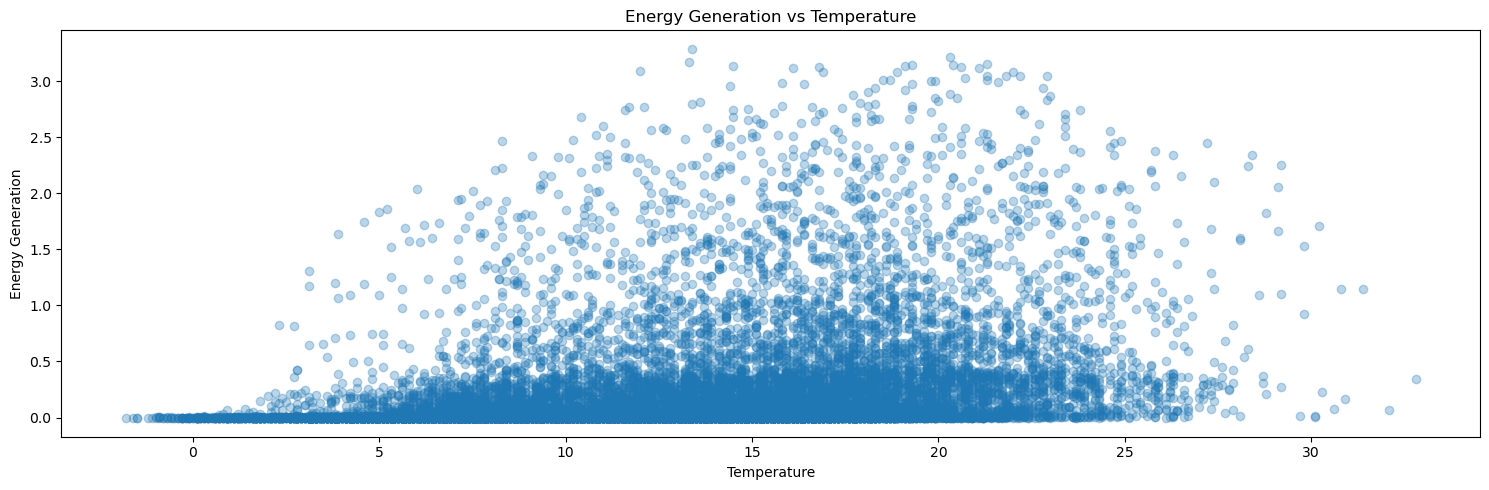

In [50]:
'''plt.figure(figsize=(30, 10))
plt.plot(merged_df['TempOut'], merged_df['P_GEN_MAX'])
plt.xlabel('temperature')
plt.ylabel('Energy Generation')
plt.title('Energy Generation vs temperature')
plt.tight_layout()
plt.show()'''

plt.figure(figsize=(15, 5))
plt.scatter(merged_df['TempOut'], merged_df['P_GEN_MAX'], alpha=0.3)
plt.xlabel('Temperature')
plt.ylabel('Energy Generation')
plt.title('Energy Generation vs Temperature')
plt.tight_layout()
plt.show()

In [59]:
merged_df = merged_df.sort_values('datetime')
merged_df = merged_df.sort_values('SolarRad')

TypeError: '<' not supported between instances of 'str' and 'int'

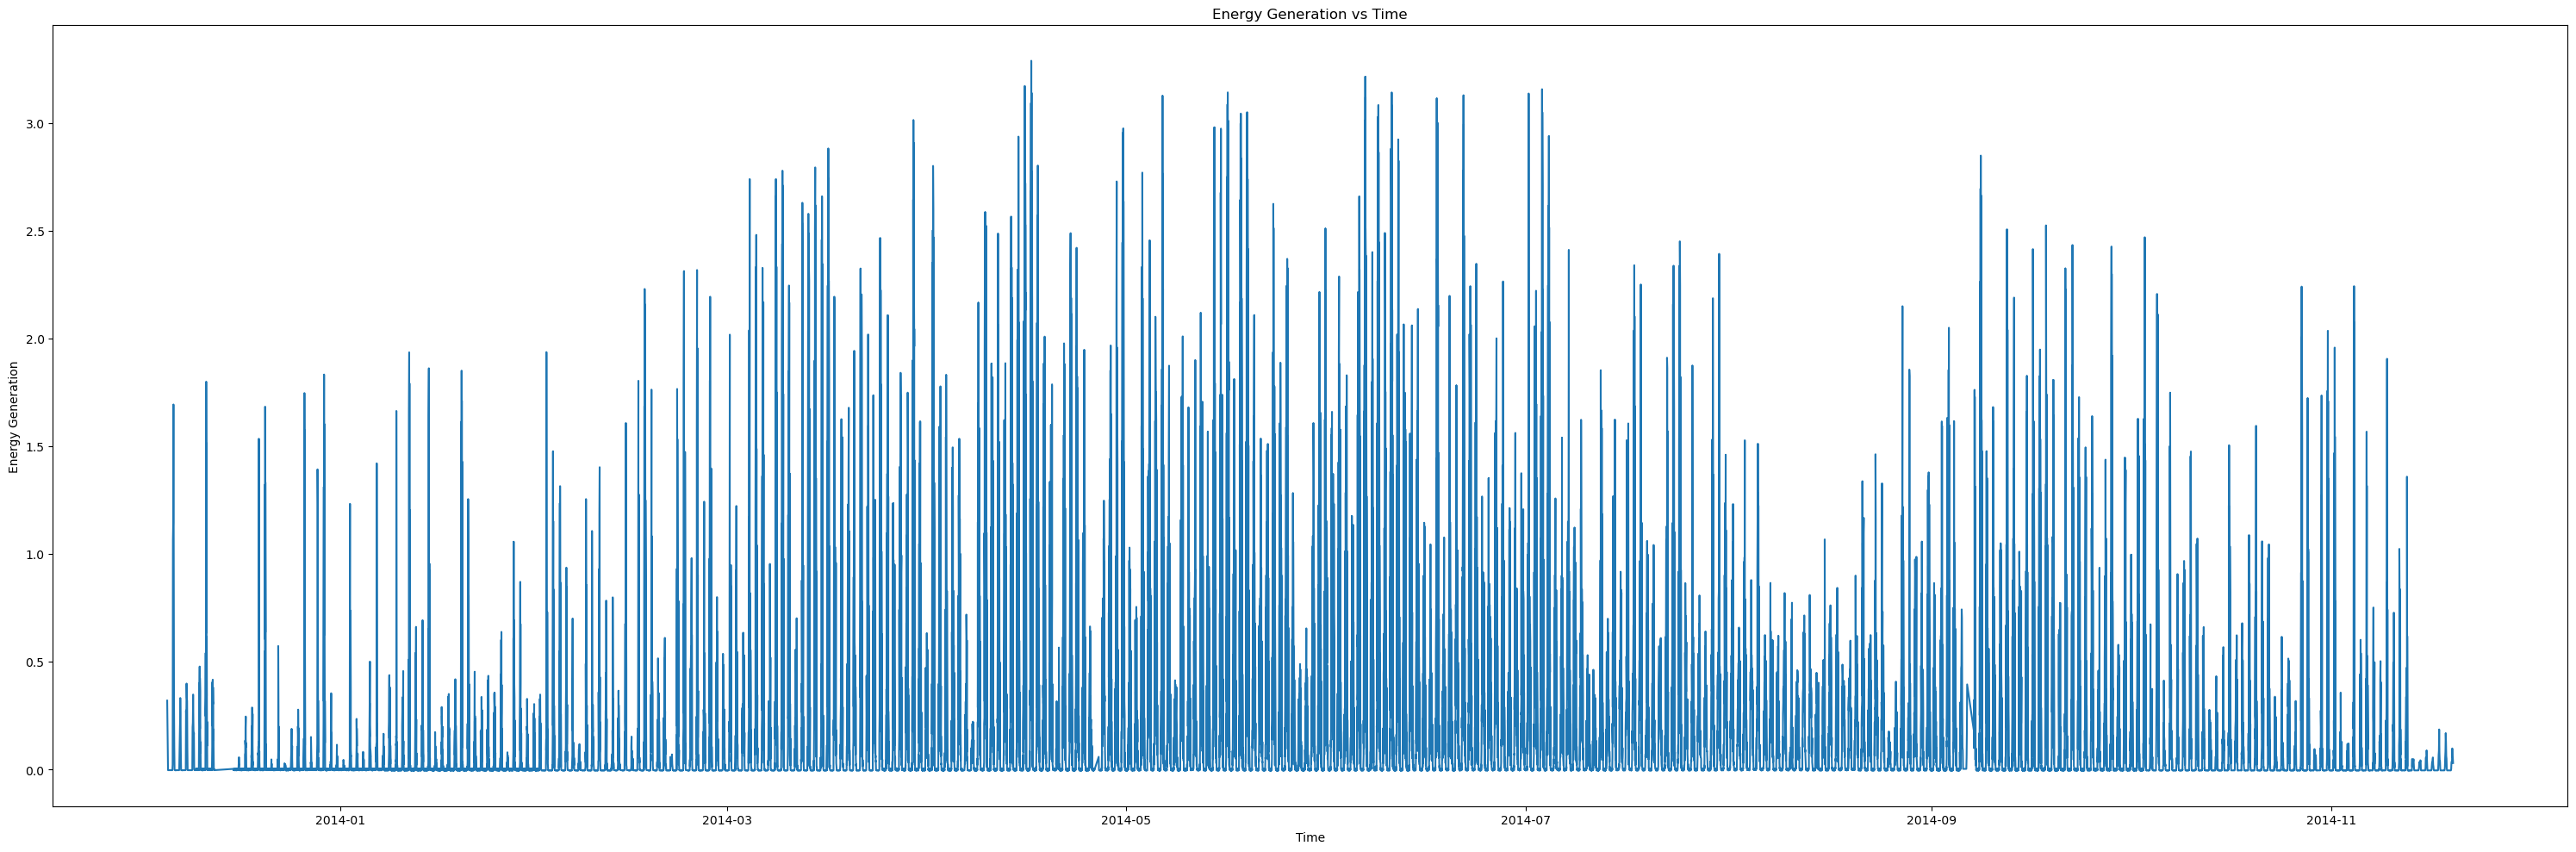

In [54]:
plt.figure(figsize=(30, 10))
plt.plot(merged_df['datetime'], merged_df['P_GEN_MAX'])
plt.xlabel('Time')
plt.ylabel('Energy Generation')
plt.title('Energy Generation vs Time')
plt.tight_layout()
plt.show()

In [63]:
datepower_df = merged_df[['datetime', 'P_GEN_MAX']]

In [64]:
datepower_df.head()

,datetime,P_GEN_MAX
7449,2013-12-05 13:00:00,0.319
7450,2013-12-05 14:00:00,0.206
7451,2013-12-05 15:00:00,0.058
7452,2013-12-05 16:00:00,-0.004
7453,2013-12-05 17:00:00,-0.004


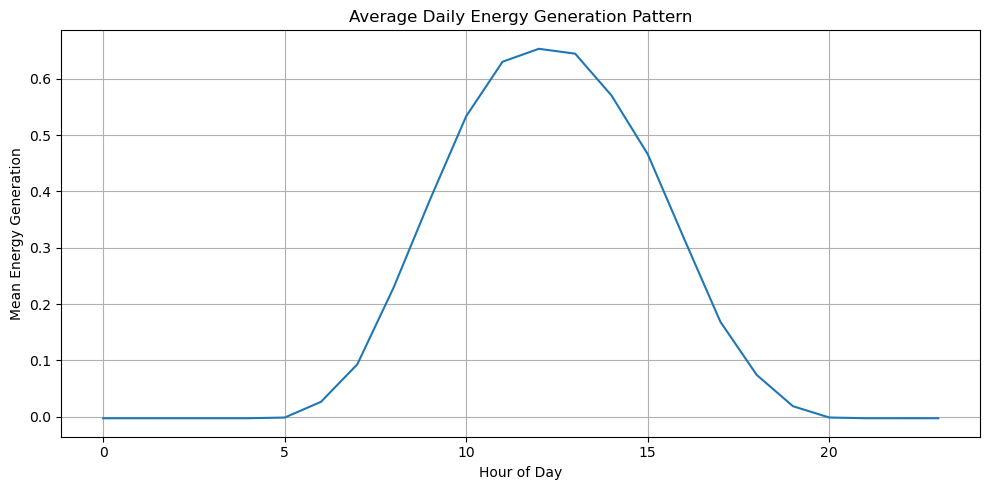

In [72]:
# Group by hour (t_h) and calculate mean energy generation
hourly_mean = merged_df.groupby('t_h')['P_GEN_MAX'].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(hourly_mean.index, hourly_mean.values, marker='')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Energy Generation')
plt.title('Average Daily Energy Generation Pattern')
plt.grid(True)
plt.tight_layout()
plt.show()

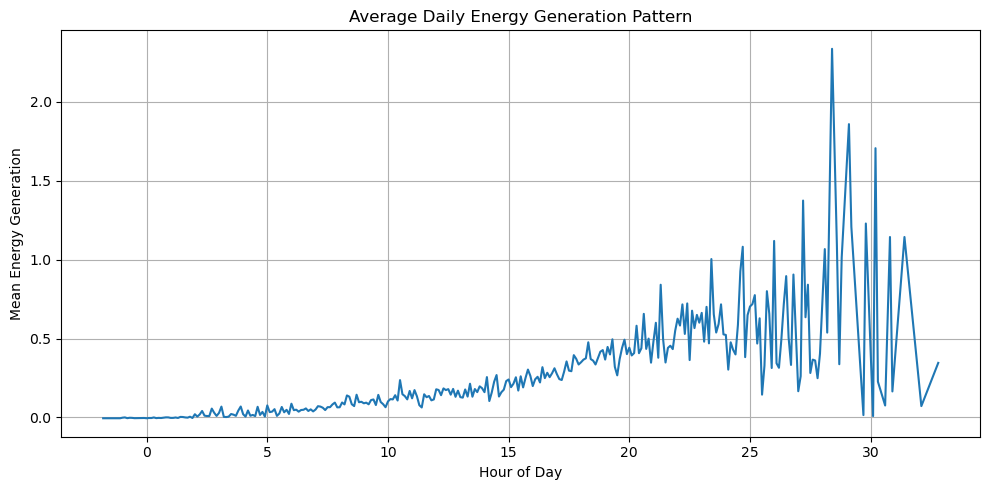

In [71]:
# Group by hour (t_h) and calculate mean energy generation
hourly_mean = merged_df.groupby('TempOut')['P_GEN_MAX'].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(hourly_mean.index, hourly_mean.values, marker='')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Energy Generation')
plt.title('Average Daily Energy Generation Pattern')
plt.grid(True)
plt.tight_layout()
plt.show()

In [73]:
print(merged_df['P_GEN_MAX'].describe())

count    19870.000000
mean         0.198968
std          0.437855
min         -0.006000
25%         -0.004000
50%          0.002000
75%          0.196000
max          3.288000
Name: P_GEN_MAX, dtype: float64


In [74]:
print(merged_df.isnull().sum())

Substation                          0
Date                                0
Month                               0
Time                                0
Hour                                0
                                 ... 
V_MAX_Rise_vs_VA_MAX_Filtered    1768
V_MAX_Rise_vs_VB_MIN_Filtered    1774
V_MAX_Rise_vs_VB_MAX_Filtered    1772
V_MAX_Rise_vs_VC_MIN_Filtered    1773
V_MAX_Rise_vs_VC_MAX_Filtered    1771
Length: 103, dtype: int64


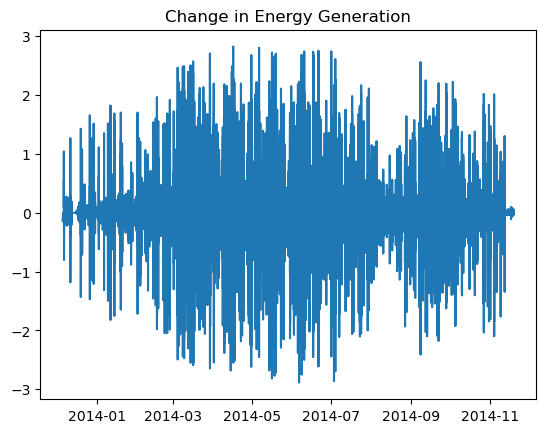

In [75]:
merged_df['diff'] = merged_df['P_GEN_MAX'].diff()
plt.plot(merged_df['datetime'], merged_df['diff'])
plt.title('Change in Energy Generation')
plt.show()